# Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.get_data import *
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from src.preprocessing import *
from src.visualize import visualize_weight_vector

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [7]:
b_data, u_data, reviews = get_training_data(b_cols='maybe', verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)

b_data.head()

========== Feature 'attributes_AcceptsInsurance' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_Alcohol' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_Ambience' ==========
TYPE: dict. Creating new features and doing one-hot encoding.

========== Feature 'attributes_BusinessParking' ==========
TYPE: dict. Creating new features and doing one-hot encoding.

========== Feature 'attributes_Caters' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_DogsAllowed' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_GoodForDancing' ==========
TYPE: boolean. Changing

,attributes_AcceptsInsurance,attributes_Caters,attributes_DogsAllowed,attributes_GoodForDancing,attributes_GoodForKids,attributes_HasTV,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,...,attributes_NoiseLevelLOUD,attributes_NoiseLevelQUIET,attributes_RestaurantsAttireCASUAL,attributes_RestaurantsAttireNAN,attributes_RestaurantsAttireDRESSY,attributes_RestaurantsAttireFORMAL,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.014099,1.0,0.000000,0.186432,0.0,0.0,1.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,0.014099,0.0,0.226737,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.014099,0.0,0.226737,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,0.014099,0.0,0.226737,0.186432,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,0.014099,1.0,0.226737,0.186432,1.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Preprocessing / dimensionality reduction

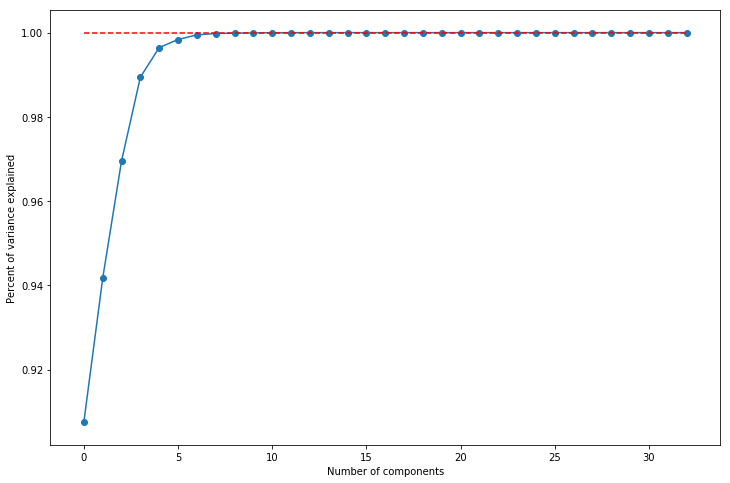

Using 10 components - 0.999978 of variance explained.


In [80]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=10, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

# Regression

In [8]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [9]:
clf = Ridge(alpha=0.05)
clf.fit(X, y)

# clf_n = Ridge(alpha=0.05)
# clf_n.fit(X_n, y)

# clf_pca = Ridge(alpha=0.05)
# clf_pca.fit(X_pca, y)


# training error
y_pred_train = clf.predict(X)
mse_train = rmse(y, y_pred_train)
print('%f  <- Training RMSE' % mse_train)

# # training error (normalized columns)
# y_pred_train_norm = clf_n.predict(X_n)
# mse_train_norm = rmse(y, y_pred_train_norm)
# print('%f  <- Training RMSE (norm)' % mse_train_norm)

# # training error (PCA)
# y_pred_train_pca = clf_pca.predict(X_pca)
# mse_train_pca = rmse(y, y_pred_train_pca)
# print('%f  <- Training RMSE (PCA)' % mse_train_pca)

# print('')

# validation error
y_pred_valid = clf.predict(X_valid)
mse_valid = rmse(y_valid, y_pred_valid)
print('%f  <- Validation RMSE' % mse_valid)

# # validation error (normalized columns)
# y_pred_valid_norm = clf_n.predict(X_valid_n)
# mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
# print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

# # validation error (PCA)
# y_pred_valid_pca = clf_pca.predict(X_valid_pca)
# mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
# print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)

1.004246  <- Training RMSE
1.052503  <- Validation RMSE


# Inspect weight vector

num weights ~= 0: 10


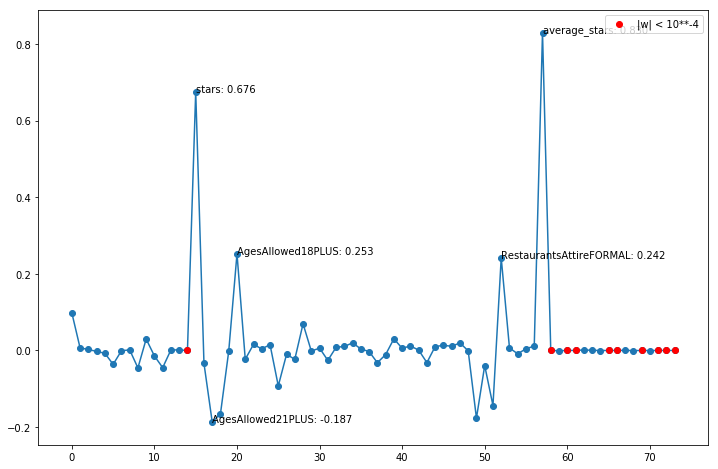

In [19]:
w = clf.coef_
all_columns = np.append(b_data.columns, u_data.columns)

visualize_weight_vector(w, column_names=all_columns)

In [11]:
for i, col in enumerate(all_columns):
    if w[i] < 0:
        print('%f  <- |w| for %s' % (w[i], col))
    else:
        print(' %f  <- |w| for %s' % (w[i], col))

 0.097930  <- |w| for attributes_AcceptsInsurance
 0.006343  <- |w| for attributes_Caters
 0.002820  <- |w| for attributes_DogsAllowed
-0.002676  <- |w| for attributes_GoodForDancing
-0.007319  <- |w| for attributes_GoodForKids
-0.036304  <- |w| for attributes_HasTV
-0.000969  <- |w| for attributes_OutdoorSeating
 0.001655  <- |w| for attributes_RestaurantsDelivery
-0.045521  <- |w| for attributes_RestaurantsGoodForGroups
 0.029880  <- |w| for attributes_RestaurantsPriceRange2
-0.014380  <- |w| for attributes_RestaurantsReservations
-0.044852  <- |w| for attributes_RestaurantsTableService
 0.001540  <- |w| for latitude
 0.001316  <- |w| for longitude
 0.000021  <- |w| for review_count
 0.675515  <- |w| for stars
-0.033725  <- |w| for attributes_AgesAllowedNAN
-0.187006  <- |w| for attributes_AgesAllowed21PLUS
-0.165028  <- |w| for attributes_AgesAllowedALLAGES
-0.001717  <- |w| for attributes_AgesAllowed19PLUS
 0.252578  <- |w| for attributes_AgesAllowed18PLUS
-0.023007  <- |w| for att